# Test Case 1 : Crescent Dataset

- One of the tasks for binary-class classification

In [1]:
import import_ipynb

In [2]:
from mlp import *

importing Jupyter notebook from mlp.ipynb
importing Jupyter notebook from mlp_component.ipynb
importing Jupyter notebook from activation.ipynb
importing Jupyter notebook from regularization.ipynb
importing Jupyter notebook from compute_cost.ipynb
importing Jupyter notebook from losses.ipynb
importing Jupyter notebook from update_params.ipynb
importing Jupyter notebook from optimizer.ipynb
importing Jupyter notebook from debug_util.ipynb
importing Jupyter notebook from C:\Users\Wallik\Desktop\dipple\nbdip\utils\py_util.ipynb
importing Jupyter notebook from initializer.ipynb
importing Jupyter notebook from load.ipynb
importing Jupyter notebook from metrics.ipynb


importing Jupyter notebook from import_dataset.ipynb


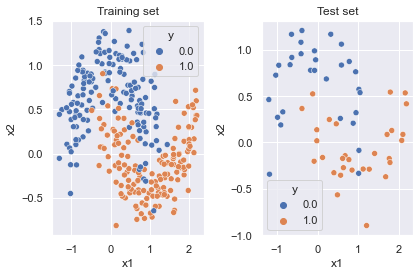

In [3]:
from import_dataset import Dataset_Library

dlib_borrow = Dataset_Library('crescent') #borrow football dataset
df_train, df_test = dlib_borrow.get_2df()

In [4]:
hyperparam_setting = {
              "layer_dims" : [2,5,2,1],
              "hidden_activation_function" : 'relu',
              "output_activation_function" : 'sigmoid',}   

In [5]:
# Training
X = df_train[['x1','x2']]
Y = df_train[['y']]

✔️ Your backward propagation works perfectly fine! difference = 4.2295748349148716e-09
✔️ Your backward propagation works perfectly fine! difference = 4.2472593850389066e-09
✔️ Your backward propagation works perfectly fine! difference = 2.1561860777452e-09
✔️ Your backward propagation works perfectly fine! difference = 5.0901643203321556e-09
✔️ Your backward propagation works perfectly fine! difference = 5.0235525964057825e-09
✔️ Your backward propagation works perfectly fine! difference = 1.6831378342897958e-09
✔️ Your backward propagation works perfectly fine! difference = 5.374241567575418e-09
✔️ Your backward propagation works perfectly fine! difference = 3.4057121623768852e-09
✔️ Your backward propagation works perfectly fine! difference = 3.81031230597613e-09
✔️ Your backward propagation works perfectly fine! difference = 5.464201991840159e-09
Epoch 1000/27000 : ===Cost=== : 0.4433844520553876
✔️ Your backward propagation works perfectly fine! difference = 4.974466767275782e-09


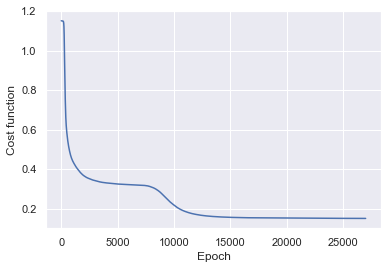

In [10]:
lambd = 1e-5   # slight regularization
lr = 1e-4

model = MultilayerPerceptron.initiate_by_hyperparam_dict(hyperparam_setting)
model.compiles(initialization='he',lr=lr,loss='binary_cross_entropy_loss',regularization="L2",lambd= lambd,optimizer='adam',beta1=0.9,beta2=0.99,eps=10e-8)
#model.compiles(initialization='he',regularization="dropout",keep_prob_sequence = [1,0.5,0.6,0.7,1,1])
model.fit(X,Y,Epochs=27000,batch_size=32,grad_check=True)

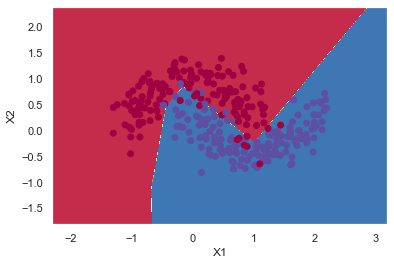

0.94


In [11]:
from interpret import plot_decision_boundary_2D
from metrics import accuracy_score

threshold = 0.5

plot_decision_boundary_2D(model=model,X=X,y=Y,threshold=threshold)
Y_pred = model.predict(X,threshold = threshold)
print(accuracy_score(Y_pred,Y))

In [9]:
import pickle

export = False    # set to True if want to export
if export:
    pickle.dump(model, open('model.pkl', 'wb'))
    model = pickle.load(open('sample_model/model_crescent.pkl', 'rb')) 